In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (MinMaxScaler, 
                                   OneHotEncoder,
                                   OrdinalEncoder)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import time 
import sys 
sys.path.append("../lib")
from utils.get_snowpark_df import get_snowpark_df

In [2]:
df = get_snowpark_df().to_pandas()

In [3]:
numerics = ['FIXED_ACIDITY',
            'VOLATILE_ACIDITY',
            'CITRIC_ACID',
            'RESIDUAL_SUGAR',
            'CHLORIDES',
            'FREE_SULFUR_DIOXIDE',
            'TOTAL_SULFUR_DIOXIDE',
            'DENSITY',
            'PH',
            'SULPHATES',
            'ALCOHOL']
cats = ["TYPE"]
target = "QUALITY"

In [4]:
scaler = MinMaxScaler()
scaler.fit(df[numerics])
df[numerics] = scaler.transform(df[numerics])

In [5]:
df.head()

,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,FREE_SULFUR_DIOXIDE,TOTAL_SULFUR_DIOXIDE,DENSITY,PH,SULPHATES,ALCOHOL,QUALITY,TYPE
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,r
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,r
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,r
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,r
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,r


In [6]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(df[cats])
ohe_transformed = ohe.transform(df[cats])
ohe_transformed_cols = ohe.get_feature_names_out()
ohe_df = pd.DataFrame(ohe_transformed, 
                      columns=ohe_transformed_cols)

In [7]:
df.drop(cats, 
        inplace=True, 
        axis=1)

In [8]:
df

,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,FREE_SULFUR_DIOXIDE,TOTAL_SULFUR_DIOXIDE,DENSITY,PH,SULPHATES,ALCOHOL,QUALITY
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,6
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,5
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,6
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,7


In [9]:
model_df = pd.concat([df, ohe_df], axis=1)

In [10]:
model_df

,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,FREE_SULFUR_DIOXIDE,TOTAL_SULFUR_DIOXIDE,DENSITY,PH,SULPHATES,ALCOHOL,QUALITY,TYPE_r,TYPE_w
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,1.0,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,1.0,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,1.0,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,1.0,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,6,0.0,1.0
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,5,0.0,1.0
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,6,0.0,1.0
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,7,0.0,1.0


In [11]:
ohe_df

,TYPE_r,TYPE_w
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
6492,0.0,1.0
6493,0.0,1.0
6494,0.0,1.0
6495,0.0,1.0


In [12]:
model_df = model_df.sample(frac=1)

In [19]:
target_vars = [x for x in list(model_df.columns) if x != "QUALITY"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(model_df[target_vars], 
                                                    model_df[target], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [21]:
forest = RandomForestClassifier(n_estimators=1200)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1200)

In [22]:
forest.score(X_test, y_test)

0.7061538461538461

In [23]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

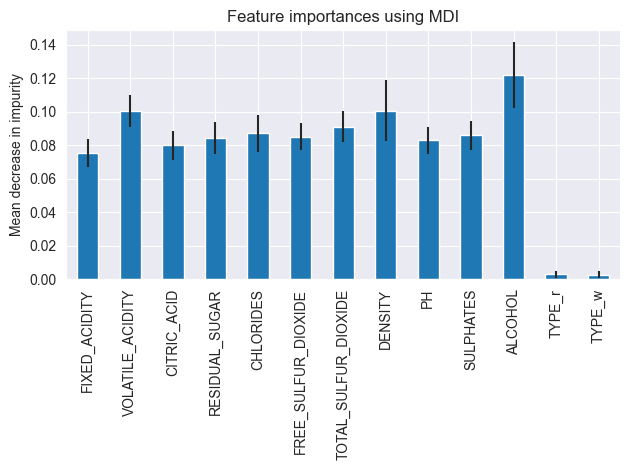

In [24]:
forest_importances = pd.Series(importances, index=target_vars)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [25]:
df["QUALITY"].value_counts()

QUALITY
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [ ]:
CAT_MAPPER = {3: 0, 4:1, 5:2, 6:3, 7:4, 8:5, 9:6}